In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
#sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

import tensorflow as tf
from tensorflow import keras
# from keras import metrics
from tensorflow.keras import layers
#tf.get_logger().setLevel('INFO')

import random

random.seed(1234)   
np.random.seed(1234)

2022-07-14 01:09:39.211837: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def plot_loss_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

def plot_accuracy_history(history):
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['accuracy'] + 1)))
  plt.plot(history['accuracy'], label="training", marker='o')
  plt.plot(history['val_accuracy'], label="validation", marker='o')
  plt.legend()
  plt.show()

# Best logistic regression model on raw data. 

In [ ]:
raw_df = pd.read_csv('csv/out_gameemo_time_domain_simple.csv', sep=',')
raw_df.head()

In [ ]:
# map_labels = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}
# for sparse category, it needs to be non-zero
map_labels = {1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}

raw_df["Label"] = raw_df["Label"].map(map_labels)

In [ ]:
Xr = raw_df.iloc[:,:-1]
yr = raw_df.iloc[:,-1:] 
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size=0.7, random_state=0)

In [ ]:
print('Shape of data: ', raw_df.shape)
print('train features.shape: ', Xr_train.shape)
print('train label.shape: ', yr_train.shape)

In [ ]:
yr_train.value_counts()

In [ ]:
def build_model_raw():

    model = keras.Sequential([layers.BatchNormalization(),
                              layers.Dense(units=256,activation='relu'),
                              layers.Dense(units=64,activation='relu'),
                              layers.Dense(units=16,activation='relu'),
                              layers.Dense(units=4,activation='softmax')])

    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.2)

    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [ ]:
model = build_model_raw()

history = model.fit(x=Xr_train,y=yr_train,epochs=10,batch_size=120,validation_split=0.1)

history = pd.DataFrame(history.history)
display(history)

In [ ]:
history_data = pd.DataFrame(history.history)
plot_loss_history(history_data)
plot_accuracy_history(history_data)

# test model
test_results = model.evaluate(Xr_test, yr_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

In [ ]:
model = build_model_raw()

history = model.fit(x=Xr_train,y=yr_train,epochs=10,batch_size=120,validation_data=(Xr_test,yr_test))

history = pd.DataFrame(history.history)
display(history)

# Best logistic regression model on script produced data. 

In [3]:
init_df = pd.read_csv('csv/out_gameemo_corrected.csv', sep=',')
init_df.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_6,lag1_mean_7,lag1_mean_8,lag1_mean_9,...,freq_669_13,freq_679_13,freq_689_13,freq_699_13,freq_709_13,freq_720_13,freq_730_13,freq_740_13,freq_750_13,Label
0,-2.934765,0.267884,-2.144542,-2.533547,-3.066073,0.328303,-1.131894,5.429830,-0.836372,8.041636,...,0.007022,0.009016,0.002528,0.004360,0.002872,0.002023,0.004519,0.003357,0.004046,4.0
1,-6.458215,5.005935,-0.725545,8.512712,-17.244226,20.164538,-0.707510,1.786132,-1.287160,-1.528923,...,0.007777,0.003482,0.003310,0.001004,0.001927,0.004033,0.001630,0.002139,0.002550,1.0
2,-1.055457,-0.677152,0.241560,0.079234,-1.386140,-0.207097,-0.201138,-5.107441,1.374121,-0.398227,...,0.006512,0.004879,0.004725,0.003842,0.003871,0.002725,0.002234,0.002157,0.000697,1.0
3,1.104418,0.758306,0.877612,1.910334,5.005314,3.530473,-1.477243,0.118954,-0.916840,-1.358008,...,0.006753,0.008789,0.005344,0.000313,0.002932,0.003106,0.004528,0.003814,0.003689,2.0
4,1.543269,-0.106916,0.183276,-0.624663,0.278018,-0.392274,-0.944821,1.830702,-0.935904,2.064984,...,0.003381,0.001809,0.002519,0.002780,0.010865,0.003386,0.002724,0.007896,0.007865,4.0


In [4]:
# map_labels = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}

#HA_PV = high arousal, positive valence
#HA_NV = high arousal, negative valence
#LA_NV = low arousal, negative valence
#LA_PV = low arousal, positive valance
map_labels = {1:"HA_PV", 2:"HA_NV", 3:"LA_NV", 4:"LA_PV"}

init_df["Label"] = init_df["Label"].map(map_labels)
init_df.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_6,lag1_mean_7,lag1_mean_8,lag1_mean_9,...,freq_669_13,freq_679_13,freq_689_13,freq_699_13,freq_709_13,freq_720_13,freq_730_13,freq_740_13,freq_750_13,Label
0,-2.934765,0.267884,-2.144542,-2.533547,-3.066073,0.328303,-1.131894,5.429830,-0.836372,8.041636,...,0.007022,0.009016,0.002528,0.004360,0.002872,0.002023,0.004519,0.003357,0.004046,LA_PV
1,-6.458215,5.005935,-0.725545,8.512712,-17.244226,20.164538,-0.707510,1.786132,-1.287160,-1.528923,...,0.007777,0.003482,0.003310,0.001004,0.001927,0.004033,0.001630,0.002139,0.002550,HA_PV
2,-1.055457,-0.677152,0.241560,0.079234,-1.386140,-0.207097,-0.201138,-5.107441,1.374121,-0.398227,...,0.006512,0.004879,0.004725,0.003842,0.003871,0.002725,0.002234,0.002157,0.000697,HA_PV
3,1.104418,0.758306,0.877612,1.910334,5.005314,3.530473,-1.477243,0.118954,-0.916840,-1.358008,...,0.006753,0.008789,0.005344,0.000313,0.002932,0.003106,0.004528,0.003814,0.003689,HA_NV
4,1.543269,-0.106916,0.183276,-0.624663,0.278018,-0.392274,-0.944821,1.830702,-0.935904,2.064984,...,0.003381,0.001809,0.002519,0.002780,0.010865,0.003386,0.002724,0.007896,0.007865,LA_PV


In [5]:
X = init_df.iloc[:,:-1]
y = init_df.iloc[:,-1:] 
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.6, random_state=0)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate, y_validate, train_size=0.5, random_state=0)

y_train = pd.get_dummies(y_train)
y_validate = pd.get_dummies(y_validate)
y_test = pd.get_dummies(y_test)

y_train.iloc[0:10]

,Label_HA_NV,Label_HA_PV,Label_LA_NV,Label_LA_PV
22300,1,0,0,0
38635,0,0,1,0
19248,0,0,1,0
5682,0,0,0,1
18308,0,0,0,1
9109,0,1,0,0
16314,1,0,0,0
10351,0,0,1,0
18225,0,0,0,1
6063,0,0,0,1


In [6]:
print('Shape of data: ', init_df.shape)
print('train features.shape: ', X_train.shape)
print('train label.shape: ', y_train.shape)
print('validate features.shape: ', X_validate.shape)
print('test features.shape: ', X_test.shape)

Shape of data:  (40071, 3739)
train features.shape:  (24042, 3738)
train label.shape:  (24042, 4)
validate features.shape:  (8014, 3738)
test features.shape:  (8015, 3738)


In [7]:
def build_model_a():

    model = keras.Sequential([layers.BatchNormalization(),
                              layers.Dense(units=256,activation='relu'),
                              layers.Dense(units=4,activation='softmax')])

    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.2)
#     optimizer =  tf.keras.optimizers.SGD(learning_rate=0.001)

#     model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [ ]:
# model = build_model_a()

# history = model.fit(x=X_train,y=y_train,epochs=10,batch_size=120,validation_split=0.1)

# history = pd.DataFrame(history.history)
# display(history)

In [8]:
model = build_model_a()

history = model.fit(x=X_train,y=y_train,epochs=10,batch_size=120,validation_data=(X_test,y_test))

history_data = pd.DataFrame(history.history)
display(history_data)

2022-07-14 01:10:55.373621: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-14 01:10:55.374788: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-14 01:10:55.385828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:67:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-07-14 01:10:55.386385: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:68:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-07-14 01:10:55.386421: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-

Epoch 1/10
  1/201 [..............................] - ETA: 1:24 - loss: 1.8772 - accuracy: 0.2417

2022-07-14 01:10:57.322698: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


201/201 [==============================] - 2s 7ms/step - loss: 1.1904 - accuracy: 0.5442 - val_loss: 1.0268 - val_accuracy: 0.5852
Epoch 2/10
201/201 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8407 - val_loss: 0.7507 - val_accuracy: 0.7157
Epoch 3/10
201/201 [==============================] - 1s 5ms/step - loss: 0.2256 - accuracy: 0.9205 - val_loss: 0.5281 - val_accuracy: 0.8141
Epoch 4/10
201/201 [==============================] - 1s 5ms/step - loss: 0.1245 - accuracy: 0.9593 - val_loss: 0.4541 - val_accuracy: 0.8548
Epoch 5/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.4523 - val_accuracy: 0.8594
Epoch 6/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0473 - accuracy: 0.9878 - val_loss: 0.3921 - val_accuracy: 0.8751
Epoch 7/10
201/201 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9916 - val_loss: 0.4430 - val_accuracy: 0.8664
Epoch 8/10
201/20

,loss,accuracy,val_loss,val_accuracy
0,0.892100,0.646036,1.026757,0.585153
1,0.401001,0.846727,0.750749,0.715658
2,0.231618,0.916771,0.528074,0.814099
3,0.127364,0.956784,0.454076,0.854772
4,0.079902,0.975168,0.452270,0.859389
5,0.052415,0.986482,0.392146,0.875109
6,0.033450,0.992555,0.443005,0.866376
7,0.023153,0.994842,0.367155,0.888833
8,0.016767,0.996215,0.396812,0.887336
9,0.014091,0.996964,0.448754,0.877604


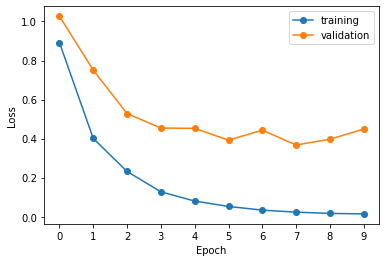

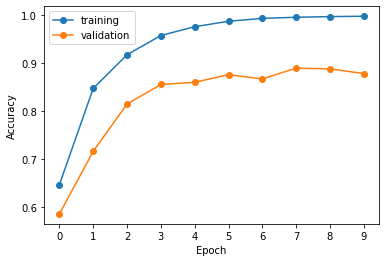

251/251 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.8776

Test Acc. 87.76%


In [9]:

plot_loss_history(history_data)
plot_accuracy_history(history_data)

# test model
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

# Using matrix multiplication to reduce number of features to 1246 (random 33% of features).

In [ ]:
random.seed(0)
indices = random.sample(range(len(X_train.columns)),len(X_train.columns))
X_train_mix = X_train.iloc[:,indices]

In [ ]:
u, s, v = np.linalg.svd(X_train_mix,full_matrices=False)
X_train_mix_transformed = u[:,0:1246]*s[0:1246]

In [ ]:
print('train features.shape: ', X_train_mix_transformed.shape)
print('train label.shape: ', y_train.shape)

In [ ]:
model = build_model_a()

history = model.fit(x=X_train_mix_transformed,y=y_train,epochs=10,batch_size=120,validation_split=0.1)

history = pd.DataFrame(history.history)
display(history)

# Using random forest to reduce number of features to 140 (4% of most important features).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y_train_1d = np.array(y_train)

In [ ]:
mymodel = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='auto')
mymodel.fit(X_train, y_train_1d)

In [ ]:
feature_importances = list(zip(X_train, mymodel.feature_importances_))
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_names_140 = [i[0] for i in feature_importances_ranked[:140]]
X = init_df[feature_names_140]

In [ ]:
y = init_df.iloc[:,-1:] 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [ ]:
print('Shape of data: ', reduced_df_rf.shape)
print('train features.shape: ', X_train.shape)
print('train label.shape: ', y_train.shape)

In [ ]:
model = build_model_a()

history = model.fit(x=X_train,y=y_train,epochs=10,batch_size=120,validation_split=0.1)

history = pd.DataFrame(history.history)
display(history)